In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Cleaned Dataset\stroke_data.csv")
df.head()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1


In [3]:
print(df.isnull().sum().sum())

0


In [4]:
df.shape

(10000, 10)

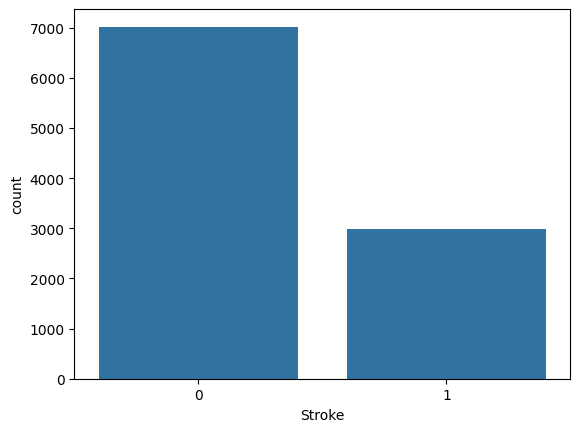

In [5]:
sns.countplot(data=df, x='Stroke')
plt.show()

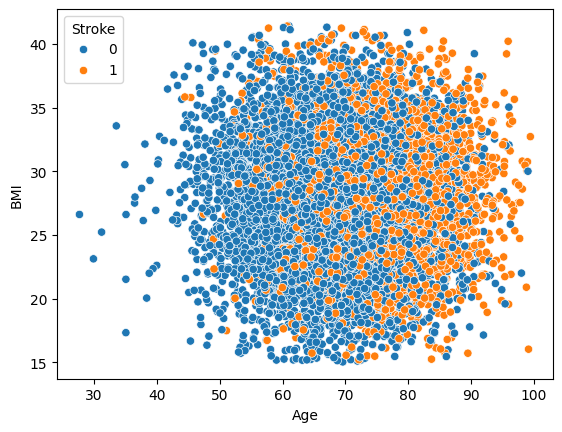

In [40]:
sns.scatterplot(data=df, x='Age', y='BMI', hue='Stroke')
plt.show()

In [6]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5
df = df[df['BMI']<max_range]

In [43]:
x = df[['Age', 'BMI']]
y = df['Stroke']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
print(f"{lr.score(x_test, y_test)*100:.2f}")

73.03


In [48]:
print(lr.predict([[66, 32.42]]))

[0]


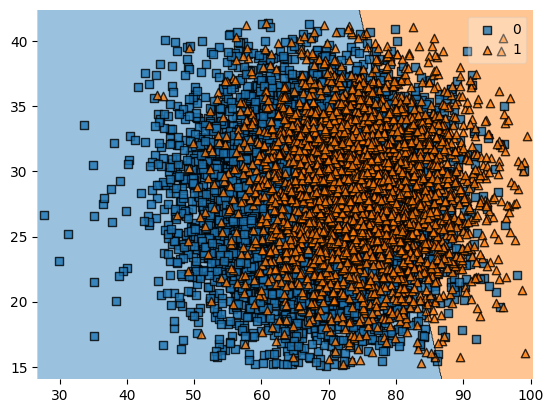

In [54]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = lr)
plt.show()

# Applying Polynomial Features

In [7]:
inp = df[['Age']]
out = df['Stroke']

In [14]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
pf.fit(inp)

PolynomialFeatures(degree=3)

In [15]:
inp = pf.transform(inp)

In [10]:
inp.shape

(9975, 3)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, out, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
lr.score(x_test, y_test)*100

74.93734335839599